In [24]:
# All imports and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [12]:
# Create set of random longitudes and latitudes
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
longs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_longs = zip(lats, longs)
lat_longs

In [13]:
# Add lat_longs to a list to unpack data
coordinates = list(lat_longs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5809be67b32647cbfb2afe6fa269d78d


In [16]:
# Create empty list to hold city weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Looping through cities
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run city API request
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | vanavara
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | dossor
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | jacareacanga
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | capoterra
Processing Record 22 of Set 1 | vuktyl
Processing Recor

Processing Record 37 of Set 4 | uglegorsk
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | simbahan
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | beyla
Processing Record 47 of Set 4 | eyl
Processing Record 48 of Set 4 | noumea
Processing Record 49 of Set 4 | yako
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | tilichiki
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | emporia
Processing Record 8 of Set 5 | huilong
Processing Record 9 of Set 5 | qaqortoq
Processing Record 10 of Set 5 | ull

Processing Record 25 of Set 8 | palasa
Processing Record 26 of Set 8 | ahipara
Processing Record 27 of Set 8 | moose factory
Processing Record 28 of Set 8 | tadine
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | aparecida do taboado
Processing Record 31 of Set 8 | maluso
Processing Record 32 of Set 8 | teya
Processing Record 33 of Set 8 | viligili
City not found. Skipping...
Processing Record 34 of Set 8 | atasu
Processing Record 35 of Set 8 | constantine
Processing Record 36 of Set 8 | bani
Processing Record 37 of Set 8 | erenhot
Processing Record 38 of Set 8 | kargasok
Processing Record 39 of Set 8 | chapais
Processing Record 40 of Set 8 | okhotsk
Processing Record 41 of Set 8 | langfang
Processing Record 42 of Set 8 | bapatla
Processing Record 43 of Set 8 | kalevala
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | korgen
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | progreso
Processing Record 

Processing Record 15 of Set 12 | alpena
Processing Record 16 of Set 12 | puerto ayacucho
Processing Record 17 of Set 12 | colombo
Processing Record 18 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 19 of Set 12 | rosenberg
Processing Record 20 of Set 12 | dillon
Processing Record 21 of Set 12 | gizo
Processing Record 22 of Set 12 | nizhyn
Processing Record 23 of Set 12 | plessisville
Processing Record 24 of Set 12 | salinas
Processing Record 25 of Set 12 | himora
City not found. Skipping...
Processing Record 26 of Set 12 | riviere-au-renard
Processing Record 27 of Set 12 | evensk
Processing Record 28 of Set 12 | namibe
Processing Record 29 of Set 12 | saint-pierre
Processing Record 30 of Set 12 | svay rieng
Processing Record 31 of Set 12 | amapa
Processing Record 32 of Set 12 | sarti
Processing Record 33 of Set 12 | antalaha
Processing Record 34 of Set 12 | goleta
Processing Record 35 of Set 12 | kropotkin
Processing Record 36 of Set 12 | gustrow
Processing Re

In [17]:
print(len(city_data))

581


In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.62,72,2,13.18,PF,2021-09-15 23:52:52
1,Hermanus,-34.4187,19.2345,51.91,84,9,6.98,ZA,2021-09-15 23:52:52
2,Mataura,-46.1927,168.8643,48.47,87,99,2.48,NZ,2021-09-15 23:52:53
3,Oranjemund,-28.5500,16.4333,52.43,82,0,10.89,NA,2021-09-15 23:52:54
4,New Norfolk,-42.7826,147.0587,53.92,50,6,1.63,AU,2021-09-15 23:52:54


In [19]:
new_column_order = ["City", "Country", "Date", 
                    "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-15 23:52:52,-23.1203,-134.9692,73.62,72,2,13.18
1,Hermanus,ZA,2021-09-15 23:52:52,-34.4187,19.2345,51.91,84,9,6.98
2,Mataura,NZ,2021-09-15 23:52:53,-46.1927,168.8643,48.47,87,99,2.48
3,Oranjemund,NA,2021-09-15 23:52:54,-28.5500,16.4333,52.43,82,0,10.89
4,New Norfolk,AU,2021-09-15 23:52:54,-42.7826,147.0587,53.92,50,6,1.63


In [20]:
# Create output file
output_data_file = "weather_data/cities.csv"

#Export to .csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [21]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


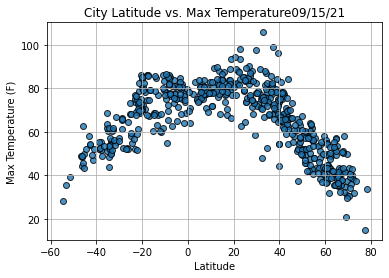

In [26]:
# Import time module
import time

# Build scatterplot
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

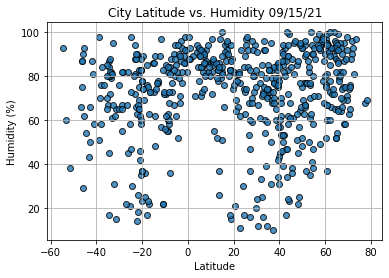

In [27]:
# Humidity Scatterplot
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


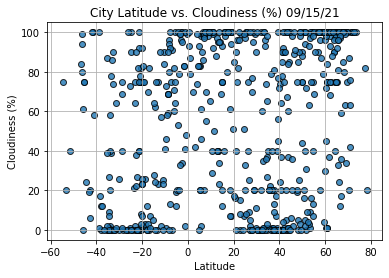

In [28]:
# Cloudiness Scatterplot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


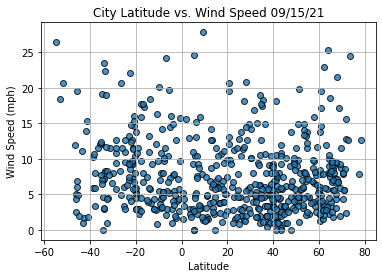

In [29]:
# Windspeed Scatterplot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()